Run this in a terminal to make sure the shared folder is mounted (only at the beginning when booting up the VM.)

    sudo mount -t vboxsf -o uid=$UID,gid=$(id -g) simulation_results ~/Documents/sf_simulation_results/

In [1]:
%%bash
cd ../chaste_build/
make MesenchymalCondensationSimulation

[  5%] Built target timekeeper
[ 11%] Built target chaste_global
[ 16%] Built target chaste_linalg
[ 16%] Built target chaste_io
[ 22%] Built target chaste_ode
[ 38%] Built target chaste_mesh
[ 44%] Built target chaste_pde
[ 88%] Built target chaste_cell_based
[100%] Built target chaste_project_cartilage
[100%] Built target MesenchymalCondensationSimulation


In [19]:
import sys
sys.path.append('analysis')

import numpy as np
import time 
import matplotlib.pyplot as plt
import distribute_executable as de
import sheet_metrics as sm

plt.style.use('seaborn-whitegrid')
plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'lines.linewidth': 3.0,
          'axes.labelsize': 'xx-large',
          'axes.titlesize':'xx-large',
          'xtick.labelsize':'xx-large',
          'ytick.labelsize':'xx-large',
          'legend.fontsize': 'xx-large',
          'font.size': 12,
          'axes.titlepad': 12,
          'axes.labelpad': 12,
          #'font.family': 'serif',
          #"mathtext.fontset": "dejavuserif",
         }
plt.rcParams.update(params)

defcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

path_to_label_files = '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/picked_result_files/'
path_to_plots = '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/plots/'

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [87]:
output_directory = 'exp-draft/mesenchymal_condensation/order/' + time.strftime("%Y%m%d-%H%M%S") +'/'
flags = ''
#flags = ' --sbt' # synchronized birth times
flags = flags + ' --T 50.0' # final time 100h
flags = flags + ' --sw 8' # 8 cells in x direction
flags = flags + ' --sd 12' # 12 cells in y direction
flags = flags + ' --mu 0.0' # adhesive spring stiffness set to 0 -> repulsion only
flags = flags + ' --A 1.0' # 100% of stem cells activated
flags = flags + ' --F pwq' # PWQ force
flags = flags + ' --mu_R 20.0' # set repulsive spring stiffness to 20.0
flags = flags + ' --p 0.1' # set perturbation to 0.1
flags = flags + ' --u 3.5' # set distance between boundaries
flags = flags + ' --psl 4' # patch size limit set to 4
flags = flags + ' --g1t 10.0' # g1 phase duration for transit cells (exponentially distributed)
flags = flags + ' --ds 3.0' # s phase duration for all cells (fixed)
flags = flags + ' --sc 1.075' # scale the initial configuration in x-y direction
#flags = flags + ' --dt 0.004' # half the default time step
flags = flags + ' --continue'
#flags = flags + ' --flat'
flags = flags + ' --lb0' #have lower bound at z=0, ie. symmetrical boundaries=false

#flags = flags + ' --rdd' #random division directions

executable='/home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation'

In [88]:
de.run_simulations_multiple_random_seeds(output_directory, flags=flags, number_of_simulations=8, executable=executable)

nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/order/20220301-143843/ --S 0 --T 50.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --continue --lb0
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/order/20220301-143843/ --S 1 --T 50.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --continue --lb0
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/order/20220301-143843/ --S 2 --T 50.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --continue --lb0
nice -n 19 /home/kubuntu1804/Documents/c

output_directory = 'exp-draft/mesenchymal_condensation/continue/20220301-132201/'

In [96]:
de.run_postprocessing_multiple_random_seeds(8, output_directory, start_time=0)

['/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/order/20220301-143843/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/order/20220301-143843/1/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/order/20220301-143843/2/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/order/20220301-143843/3/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/order/20220301-143843/4/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/order/20220301-143843/5/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/order/20220301-143843/6/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesench

# A repulsion only force and oriented cell division enable column growth

## Data:
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/20200429-144756/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.75 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.05
- 8 random seeds, random cell division directions:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/20200429-150604/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.75 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.05 --rdd
- 8 random seeds, activation percentage 100%:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20200505-101413/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/continue/20200505-141629/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --continue
- 8 random seeds, activation percentage 100%, less cells, random cell division directions:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20200505-104632/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --rdd
- 8 random seeds, activation percentage 100%
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20220223-100916/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075
- 8 random seeds, maxNumberTransitGenerations=12 (was 2 before)
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20220223-113618/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075
- 8 random seeds, maxNUmberTransitGenerations=12, random cell division directions:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20220223-114752/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --rdd
- 8 random seeds, lb0:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20220223-152730/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --lb0
- 8 random seeds, lb0, rdd
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20220223-155402/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --lb0 --rdd


## Average patch projection area

In [21]:
#dir_directed = 'exp-draft/mesenchymal_condensation/continue/20200505-141629/'
dir_directed = 'exp-draft/mesenchymal_condensation/orientation/20220223-152730/'
dir_random = 'exp-draft/mesenchymal_condensation/orientation/20220223-155402/'

# save label-path tuple
with open(path_to_label_files+'oriented_cd', 'w') as f:
    f.write(dir_directed+'0/')
with open(path_to_label_files+'random_cd', 'w') as f:
    f.write(dir_random+'0/')


## Simulation snapshots

In [66]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-152730/0/ -t 800

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-152730/0/
Time step is 800
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

vtkSMPVRepresentationProxy (0x55ca7572cc30): Failed to determine the LookupTable being used.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeT

In [67]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-155402/0/ -t 800

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-155402/0/
Time step is 800
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

vtkSMPVRepresentationProxy (0x55f7c20f9b00): Failed to determine the LookupTable being used.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeT

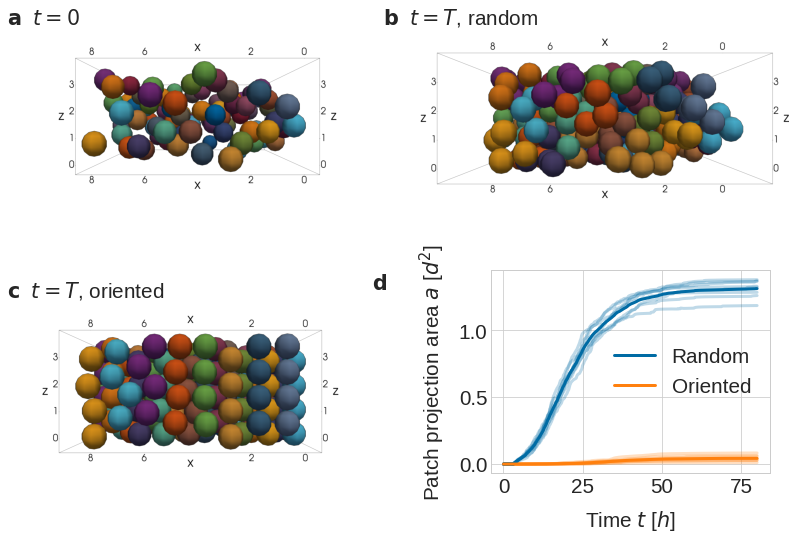

In [43]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, 
                                             figsize=(14,10), 
                                             gridspec_kw={'height_ratios': [1,1], 'hspace': 0.01, 'wspace':0.1},
                                             #constrained_layout=True
                                            )

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 


initial = mpimg.imread('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+'/0/threshold_48_minus_y_t0.png')
#crop
initial = initial[100:-100, 450:-480]
ax1.imshow(initial)
ax1.grid(False)
ax1.axis('off')
ax1.set_title(r'$\bf a$  $t=0$', loc='left')


directed = mpimg.imread('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+'/0/threshold_48_minus_y_t800.png')
#crop
directed = directed[100:-100, 450:-480]
ax3.imshow(directed)
ax3.grid(False)
ax3.axis('off')
ax3.set_title(r'$\bf c$  $t=T$, oriented', loc='left')

random = mpimg.imread('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random+'/0/threshold_48_minus_y_t800.png')
#crop
random = random[100:-100, 450:-480]
ax2.imshow(random)
ax2.grid(False)
ax2.axis('off')
ax2.set_title(r'$\bf b$  $t=T$, random', x=0.12)

#ax1.set_xticks([])
#ax1.set_yticks([])




ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ax4.plot(times_d, ppa, color=defcolors[1], alpha=0.25)
    ppa_av_d += ppa 
ppa_av_d = ppa_av_d /8

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_r, coords_r = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random + '0/results_from_time_0/') 

ppa_av_r = np.zeros(times_r.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ax4.plot(times_r, ppa, color=defcolors[0], alpha=0.25)
    ppa_av_r += ppa
ppa_av_r = ppa_av_r /8



ax4.plot(times_r, ppa_av_r, color=defcolors[0], label='Random')
ax4.plot(times_d, ppa_av_d, color=defcolors[1], label='Oriented')
ax4.legend()
#plt.title('distance 4.0')
ax4.set_xlabel('Time $t$ [$h$]')
ax4.set_ylabel('Patch projection area $a$ [$d^2$]')
ax4.set_title(r'$\bf d$', x=-0.4, y=0.85)

ll, bb, ww, hh = ax4.get_position().bounds 
ax4.set_position([ll+0.2*ww, bb+0.2*hh, ww*0.75, hh*0.75])

plt.savefig(path_to_plots+'ppa_orientation.pdf', bbox_inches='tight')

# Space is needed to initially grow columns


## Data:
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/20200429-144756/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.75 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.05
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/scaling/20200430-094725/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.75 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.00
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20200505-101413/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/scaling/20200505-110357/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.0
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/scaling/20200505-111740/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.1
- 8 random seeds, sc=1.0:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/scaling/20220225-121040/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.00 --lb0
- 8 random seeds, sc=1.1:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/scaling/20220225-122345/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.10 --lb0

In [3]:
dir_100 = 'exp-draft/mesenchymal_condensation/scaling/20220225-121040/'
dir_1075 = 'exp-draft/mesenchymal_condensation/orientation/20220223-152730/'
dir_110 = 'exp-draft/mesenchymal_condensation/scaling/20220225-122345/'

# save label-path tuple
with open(path_to_label_files+'scaling_100', 'w') as f:
    f.write(dir_100+'0/')
with open(path_to_label_files+'scaling_110', 'w') as f:
    f.write(dir_110+'0/')

In [31]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/scaling/20220225-121040/0/ -t 800

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/scaling/20220225-121040/0/
Time step is 800
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

vtkSMPVRepresentationProxy (0x559959300170): Failed to determine the LookupTable being used.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeT

In [36]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/scaling/20220225-122345/0/ -t 800

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/scaling/20220225-122345/0/
Time step is 800
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

vtkSMPVRepresentationProxy (0x55d4a94af360): Failed to determine the LookupTable being used.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeT

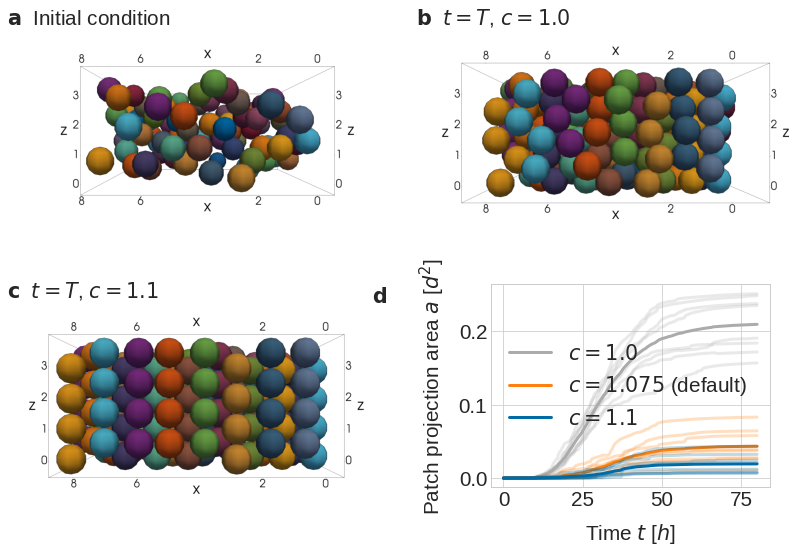

In [48]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, 
                                             figsize=(14,10), 
                                             gridspec_kw={'height_ratios': [1,1], 'hspace': 0.01, 'wspace':0.1},
                                             #constrained_layout=True
                                            )

# TODO: make inkscape figure and import
initial1 = mpimg.imread('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_100+'/0/threshold_48_minus_y_t0.png')
#crop
initial1 = initial1[100:-100, 610:-650]
ax1.imshow(initial1)
ax1.grid(False)
ax1.axis('off')
ax1.set_title(r'$\bf a$  Initial condition', loc='left')

final1 = mpimg.imread('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_100+'/0/threshold_48_minus_y_t800.png')
#crop
final1 = final1[100:-100, 610:-650]
ax2.imshow(final1)
ax2.grid(False)
ax2.axis('off')
ax2.set_title(r'$\bf b$  $t=T$, $c=1.0$', loc='left')

final2 = mpimg.imread('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_110+'/0/threshold_48_minus_y_t800.png')
#crop
final2 = final2[100:-100, 610:-650]
ax3.imshow(final2)
ax3.grid(False)
ax3.axis('off')
ax3.set_title(r'$\bf c$  $t=T$, $c=1.1$', loc='left')


# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_100 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_100+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d += ppa
    ax4.plot(times_d, ppa, color=defcolors[2], alpha=0.25)
ppa_av_d = ppa_av_d/8
ax4.plot(times_d, ppa_av_d, color=defcolors[2], label='$c=1.0$')

dir_default = 'exp-draft/mesenchymal_condensation/orientation/20220223-152730/'

times_default, coords_default = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_default + '0/results_from_time_0/') 
ppa_av_default = np.zeros(times_default.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_default+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_default += ppa
    ax4.plot(times_default, ppa, color=defcolors[1], alpha=0.25)
ppa_av_default = ppa_av_default/8


## ax1 - scaling
ax4.plot(times_default, ppa_av_default, color=defcolors[1], label='$c=1.075$ (default)')

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_110 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_110+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d += ppa
    ax4.plot(times_d, ppa, color=defcolors[0], alpha=0.25)
ppa_av_d = ppa_av_d /8
ax4.plot(times_d, ppa_av_d, color=defcolors[0], label='$c=1.1$')

ax4.set_xlabel('Time $t$ [$h$]')
ax4.set_ylabel('Patch projection area $a$ [$d^2$]')
ax4.legend()
ax4.set_title(r'$\bf d$', x=-0.4, y=0.85)

ll, bb, ww, hh = ax4.get_position().bounds 
ax4.set_position([ll+0.2*ww, bb+0.2*hh, ww*0.75, hh*0.75])


plt.savefig(path_to_plots+'scaling_configurations.pdf', bbox_inches='tight')

# Initial distance from the perichondrial boundary is beneficial for straight column growth

Heterogeneity in the z-direction enforces sufficient distance to the boundary

This refers to the scaling of the initial condition. What about the heterogeneity in the z-direction? Is this still important for a scaled sheet?

Data:
- 8 random seeds, default:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/continue/20200505-141629/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --continue
- 8 random seeds, flat mesenchymal condensation:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/flat/20200506-111626/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --flat
- 8 random seeds, flat mesenchymal condensation, boundaries symmetrical around z=0 (continue flag is unnecessary)
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/flat/20200513-155712/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --continue --flat
- 8 random seeds, flat mesenchymal condensation, lower boundary at z=0
       nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/flat/20200513-161955/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --flat --lb0
- 8 random seeds
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/flat/20220225-125830/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --flat --lb0
- 8 random seeds
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/flat/20220225-131527/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --flat

In [4]:
dir_default = 'exp-draft/mesenchymal_condensation/orientation/20220223-152730/'
dir_flat = 'exp-draft/mesenchymal_condensation/flat/20220225-131527/'
dir_lb0 = 'exp-draft/mesenchymal_condensation/flat/20220225-125830/'

# save label-path tuple
with open(path_to_label_files+'flat', 'w') as f:
    f.write(dir_flat+'0/')
    
# save label-path tuple
with open(path_to_label_files+'lb0', 'w') as f:
    f.write(dir_lb0+'0/')


In [24]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/scaling/20220225-125830/0/ -t 800

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/scaling/20220225-125830/0/
Time step is 800
Start time is 0


ERROR: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/IO/XML/vtkXMLReader.cxx, line 262
vtkPVDReader (0x5631c60100c0): Error opening file /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/scaling/20220225-125830/0/results_from_time_0/results.pvd

ERROR: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/ParaViewCore/VTKExtensions/Default/vtkPVDReader.cxx, line 134
vtkPVDReader (0x5631c60100c0): Could not read file information

ERROR: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Common/ExecutionModel/vtkExecutive.cxx, line 784
vtkPVCompositeDataPipeline (0x5631c5ff98f0): Algorithm vtkPVDReader(0x5631c60100c0) returned failure for request: vtkInformation (0x5631c8479960)
  Debug: Off
  Modified Time: 200411
  Reference Count: 1
  Registered Events: (none)
  Request: REQUEST_DATA_OBJECT
  FORWARD_DIRECTION: 0
  ALGORITHM_AFTER_FORWARD: 1



ERROR: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/IO/XML/vtkXMLReader.cxx, line 262
vtkPVDReader (0x5

In [25]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/flat/20220225-131527/0/ -t 800

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/flat/20220225-131527/0/
Time step is 800
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

vtkSMPVRepresentationProxy (0x559b480baaa0): Failed to determine the LookupTable being used.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeT

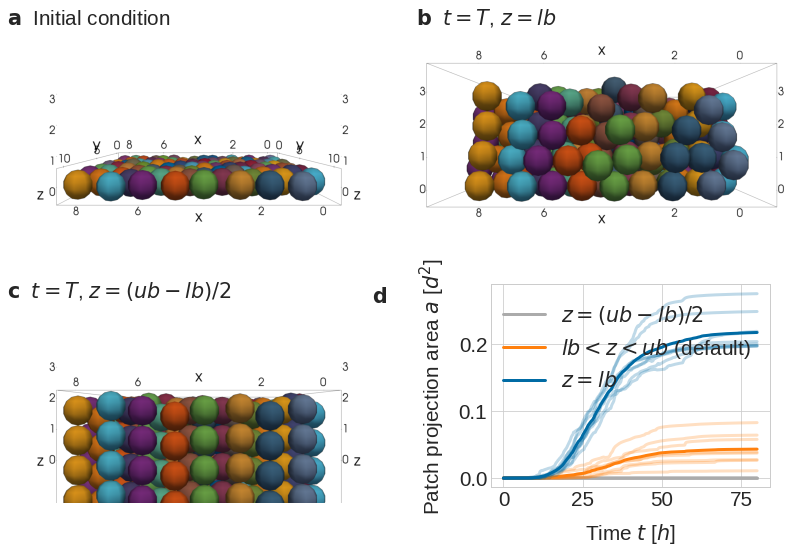

In [51]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, 
                                             figsize=(14,10), 
                                             gridspec_kw={'height_ratios': [1,1], 'hspace': 0.01, 'wspace':0.1},
                                             #constrained_layout=True
                                            )

# TODO: make inkscape figure and import
initial1 = mpimg.imread('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_flat+'/0/threshold_48_minus_y_t0.png')
#crop
initial1 = initial1[100:-100, 610:-650]
ax1.imshow(initial1)
ax1.grid(False)
ax1.axis('off')
ax1.set_title(r'$\bf a$  Initial condition', loc='left')

final1 = mpimg.imread('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_lb0+'/0/threshold_48_minus_y_t800.png')
#crop
final1 = final1[100:-100, 610:-650]
ax2.imshow(final1)
ax2.grid(False)
ax2.axis('off')
ax2.set_title(r'$\bf b$  $t=T$, $z=lb$', loc='left')

final2 = mpimg.imread('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_flat+'/0/threshold_48_minus_y_t800.png')
#crop
final2 = final2[100:-100, 610:-650]
ax3.imshow(final2)
ax3.grid(False)
ax3.axis('off')
ax3.set_title(r'$\bf c$  $t=T$, $z=(ub-lb)/2$', loc='left')


# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_flat + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_flat+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d += ppa
    ax4.plot(times_d, ppa, color=defcolors[2], alpha=0.25)
ppa_av_d = ppa_av_d/8
ax4.plot(times_d, ppa_av_d, color=defcolors[2], label='$z=(ub-lb)/2$')

dir_default = 'exp-draft/mesenchymal_condensation/orientation/20220223-152730/'

times_default, coords_default = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_default + '0/results_from_time_0/') 
ppa_av_default = np.zeros(times_default.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_default+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_default += ppa
    ax4.plot(times_default, ppa, color=defcolors[1], alpha=0.25)
ppa_av_default = ppa_av_default/8


## ax1 - scaling
ax4.plot(times_default, ppa_av_default, color=defcolors[1], label='$lb<z<ub$ (default)')

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_lb0 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_lb0+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d += ppa
    ax4.plot(times_d, ppa, color=defcolors[0], alpha=0.25)
ppa_av_d = ppa_av_d /8
ax4.plot(times_d, ppa_av_d, color=defcolors[0], label='$z=lb$')

ax4.set_xlabel('Time $t$ [$h$]')
ax4.set_ylabel('Patch projection area $a$ [$d^2$]')
ax4.legend()
ax4.set_title(r'$\bf d$', x=-0.4, y=0.85)

ll, bb, ww, hh = ax4.get_position().bounds 
ax4.set_position([ll+0.2*ww, bb+0.2*hh, ww*0.75, hh*0.75])


plt.savefig(path_to_plots+'flat_configurations.pdf', bbox_inches='tight')

# Order in the columns can only be maintained until a certain thickness of the sheet

Data:

- 8 random seeds, psl 4:

      nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20200505-101413/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075

- 8 random seeds, psl 6:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/order/20200505-113036/ --S 0 --sbt --T 140.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 5.5 --psl 6 --g1t 10.0 --ds 3.0 --sc 1.075
- 8 random seeds, psl 8:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/order/20200505-120136/ --S 0 --sbt --T 180.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 6.5 --psl 8 --g1t 10.0 --ds 3.0 --sc 1.075
- 8 randoms seeds, psl 6:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/order/20220301-113539/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 5.5 --psl 6 --g1t 10.0 --ds 3.0 --sc 1.075 --lb0
- 8 random seeds, psl 8:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/order/20220301-125119/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 7.5 --psl 8 --g1t 10.0 --ds 3.0 --sc 1.075 --lb0
- 8 random seeds, psl 6, longer run (needed for continue experiment):
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/order/20220301-141246/ --S 0 --T 130.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 5.5 --psl 6 --g1t 10.0 --ds 3.0 --sc 1.075 --lb0

In [5]:

dir_6 = 'exp-draft/mesenchymal_condensation/order/20220301-113539/'

# save label-path tuple
with open(path_to_label_files+'psl_6', 'w') as f:
    f.write(dir_6+'0/')

dir_8 = 'exp-draft/mesenchymal_condensation/order/20220301-125119/'

# save label-path tuple
with open(path_to_label_files+'psl_8', 'w') as f:
    f.write(dir_8+'0/')


In [60]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/order/20220301-125119/0/ -t 800

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/order/20220301-125119/0/
Time step is 800
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

vtkSMPVRepresentationProxy (0x563072ca2180): Failed to determine the LookupTable being used.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeT

In [47]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/order/20220301-113539/0/ -t 800


Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/order/20220301-113539/0/
Time step is 800
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

vtkSMPVRepresentationProxy (0x55a7ee752130): Failed to determine the LookupTable being used.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeT

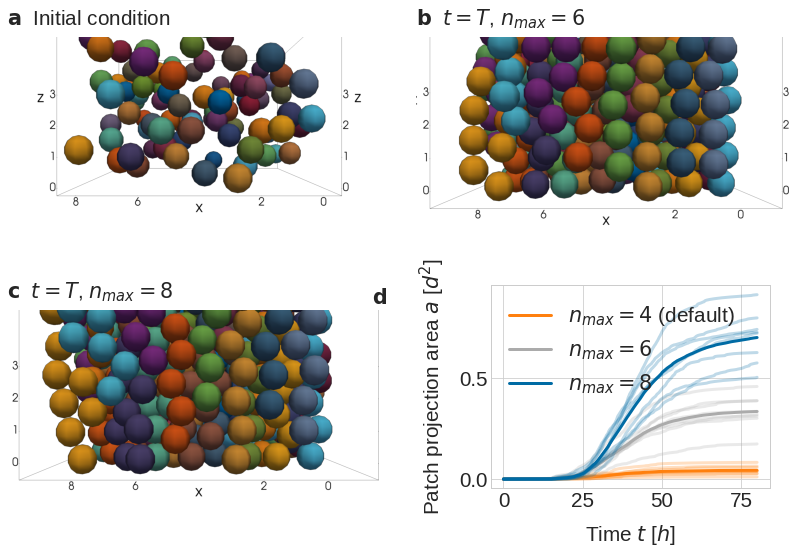

In [54]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, 
                                             figsize=(14,10), 
                                             gridspec_kw={'height_ratios': [1,1], 'hspace': 0.01, 'wspace':0.1},
                                             #constrained_layout=True
                                            )

# TODO: make inkscape figure and import
initial1 = mpimg.imread('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_6+'/0/threshold_48_minus_y_t0.png')
#crop
initial1 = initial1[100:-100, 610:-650]
ax1.imshow(initial1)
ax1.grid(False)
ax1.axis('off')
ax1.set_title(r'$\bf a$  Initial condition', loc='left')

final1 = mpimg.imread('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_6+'/0/threshold_48_minus_y_t800.png')
#crop
final1 = final1[100:-100, 610:-650]
ax2.imshow(final1)
ax2.grid(False)
ax2.axis('off')
ax2.set_title(r'$\bf b$  $t=T$, $n_{max}=6$', loc='left')

final2 = mpimg.imread('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_8+'/0/threshold_48_minus_y_t800.png')
#crop
final2 = final2[100:-100, 610:-650]
ax3.imshow(final2)
ax3.grid(False)
ax3.axis('off')
ax3.set_title(r'$\bf c$  $t=T$, $n_{max}=8$', loc='left')


dir_default = 'exp-draft/mesenchymal_condensation/orientation/20220223-152730/'

times_default, coords_default = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_default + '0/results_from_time_0/') 
ppa_av_default = np.zeros(times_default.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_default+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_default += ppa
    ax4.plot(times_default, ppa, color=defcolors[1], alpha=0.25)
ppa_av_default = ppa_av_default/8


## ax1 - scaling
ax4.plot(times_default, ppa_av_default, color=defcolors[1], label='$n_{max}= 4$ (default)')


# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_6 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_6+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d += ppa
    ax4.plot(times_d, ppa, color=defcolors[2], alpha=0.25)
ppa_av_d = ppa_av_d/8
ax4.plot(times_d, ppa_av_d, color=defcolors[2], label='$n_{max}=6$')



# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_8 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_8+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d += ppa
    ax4.plot(times_d, ppa, color=defcolors[0], alpha=0.25)
ppa_av_d = ppa_av_d /8
ax4.plot(times_d, ppa_av_d, color=defcolors[0], label='$n_{max}=8 $')

ax4.set_xlabel('Time $t$ [$h$]')
ax4.set_ylabel('Patch projection area $a$ [$d^2$]')
ax4.legend()
ax4.set_title(r'$\bf d$', x=-0.4, y=0.85)

ll, bb, ww, hh = ax4.get_position().bounds 
ax4.set_position([ll+0.2*ww, bb+0.2*hh, ww*0.75, hh*0.75])


plt.savefig(path_to_plots+'order_configurations.pdf', bbox_inches='tight')

# It is more efficient to keep order by increasing column size than to grow larger columns from scratch

- 8 random seeds (unnecessarily long run)
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/continue/20200505-134710/ --S 0 --sbt --T 180.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --continue
- 8 random seeds
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/continue/20200505-141629/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --continue
- 8 random seeds, symmetric increase in boundary distance 
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/continue/20200506-151324/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --continue
        
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/continue/20220301-132201/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --continue --lb0
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/continue/20220301-133852/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --continue
- 8 random seeds: 
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/continue/20220301-143843/ --S 0 --T 50.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --continue --lb0

In [6]:
dir_continue = 'exp-draft/mesenchymal_condensation/continue/20220301-143843/'
# save label-path tuple
with open(path_to_label_files+'continue', 'w') as f:
    f.write(dir_continue+'0/')

In [14]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/continue/20220301-132201/0/ -t 1300 -s 100

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/continue/20200506-151324/0/
Time step is 500
Start time is 100


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed 

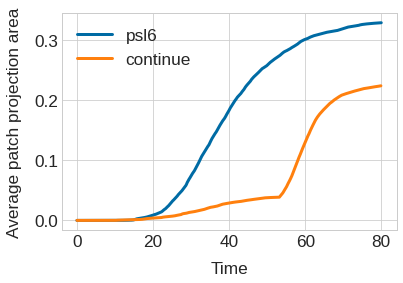

In [9]:
dir_psl6 = 'exp-draft/mesenchymal_condensation/order/20220301-141246/'



# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_psl6 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_psl6+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /8

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_r, coords_r = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_continue+ '0/results_from_time_0/') 
times_r2, coords_r2 = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_continue + '0/results_from_time_50/') 

ppa_av_r = np.zeros(len(times_r)+len(times_r2))
for seed in range(8):
    ppa_av_r[:len(times_r)] = ppa_av_r[:len(times_r)] + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_continue+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_r[len(times_r):] = ppa_av_r[len(times_r):] + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_continue+str(seed)+'/results_from_time_50/metrics_results/data_patch_projection_area_av.txt', dtype=float)

ppa_av_r = ppa_av_r /8


plt.plot(times_d[:801], ppa_av_d[:801], label='psl6')
plt.plot(np.concatenate((times_r, times_r2))[:801], ppa_av_r[:801], label='continue')

plt.legend()
#plt.title('distance 4.0')
plt.xlabel('Time')
plt.ylabel('Average patch projection area')
plt.savefig(path_to_plots+'ppa_continue.pdf', bbox_inches='tight')

Interesting! Note that this improved when the increase in distance between the boundaries is symmetric, ie we don't just raise the upper boundary but also lower the lower boundary (both by half of the total increase.)

# Put all graphs in a single figure

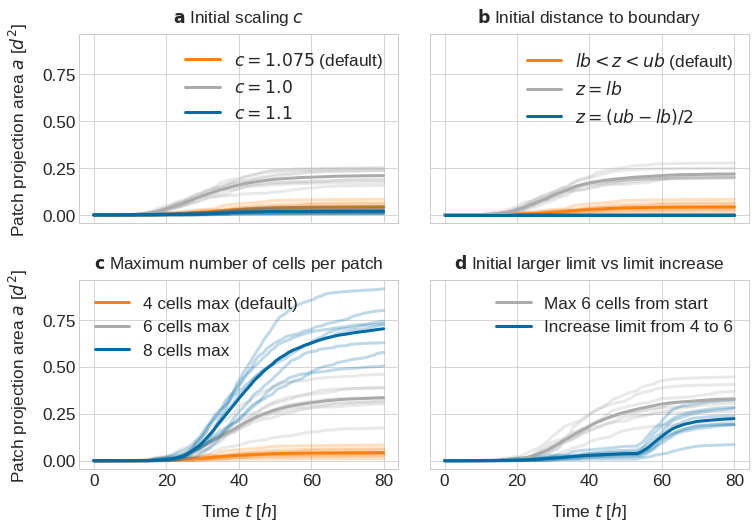

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, 
                                             figsize=(12,8), sharex='col', sharey=True,
                                             gridspec_kw={'height_ratios': [1,1], 'hspace': 0.3, 'wspace':0.1},
                                             #constrained_layout=True
                                            )

dir_default = 'exp-draft/mesenchymal_condensation/orientation/20220223-152730/'

times_default, coords_default = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_default + '0/results_from_time_0/') 
ppa_av_default = np.zeros(times_default.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_default+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_default += ppa
    ax1.plot(times_default, ppa, color=defcolors[1], alpha=0.25)
    ax2.plot(times_default, ppa, color=defcolors[1], alpha=0.25)
    ax3.plot(times_default, ppa, color=defcolors[1], alpha=0.25)
ppa_av_default = ppa_av_default/8


## ax1 - scaling
ax1.plot(times_default, ppa_av_default, color=defcolors[1], label='$c=1.075$ (default)')
# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_100 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_100+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d += ppa
    ax1.plot(times_d, ppa, color=defcolors[2], alpha=0.25)
ppa_av_d = ppa_av_d/8
ax1.plot(times_d, ppa_av_d, color=defcolors[2], label='$c=1.0$')

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_110 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_110+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d += ppa
    ax1.plot(times_d, ppa, color=defcolors[0], alpha=0.25)
ppa_av_d = ppa_av_d /8
ax1.plot(times_d, ppa_av_d, color=defcolors[0], label='$c=1.1$')

#ax1.set_xlabel('Time $t$ [$h$]')
ax1.set_ylabel('Patch projection area $a$ [$d^2$]')
ax1.legend()
ax1.set_title(r'$\bf{a}$ Initial scaling $c$')

## axis 2- distance from perichondrial border
ax2.plot(times_default, ppa_av_default, color=defcolors[1], label='$lb<z<ub$ (default)')

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_r, coords_r = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_flat + '0/results_from_time_0/') 

ppa_av_r = np.zeros(times_r.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_flat+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_r + ppa
    ax2.plot(times_d, ppa, color=defcolors[0], alpha=0.25)
ppa_av_r = ppa_av_r /8

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_l, coords_l = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_lb0 + '0/results_from_time_0/') 

ppa_av_l = np.zeros(times_l.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_lb0+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_l += ppa
    ax2.plot(times_d, ppa, color=defcolors[2], alpha=0.25)
ppa_av_l = ppa_av_l /8

ax2.plot(times_l, ppa_av_l, color=defcolors[2],  label='$z=lb$')
ax2.plot(times_r, ppa_av_r, color=defcolors[0], label='$z= (ub-lb)/2$')
ax2.legend()
ax2.set_title(r'$\bf{b}$ Initial distance to boundary')
#plt.title('distance 4.0')
#plt.xlabel('Time')
#plt.ylabel('Average patch projection area')


## axis3 - patch size limit
ax3.plot(times_default, ppa_av_default, color=defcolors[1], label='4 cells max (default)')

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_6 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_6+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    ax3.plot(times_d, ppa, color=defcolors[2], alpha=0.25)
ppa_av_d = ppa_av_d /8
ax3.plot(times_d, ppa_av_d, color=defcolors[2], label='6 cells max')

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_8 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_8+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    ax3.plot(times_d, ppa,  color=defcolors[0], alpha=0.25)
ppa_av_d = ppa_av_d /8
ax3.plot(times_d, ppa_av_d, color=defcolors[0], label='8 cells max')

ax3.legend()
ax3.set_xlabel('Time $t$ [$h$]')
ax3.set_ylabel('Patch projection area $a$ [$d^2$]')
ax3.set_title(r'$\bf{c}$ Maximum number of cells per patch')


## axis 4 - increasing column size vs growing larger columns from scratch
dir_psl6 = 'exp-draft/mesenchymal_condensation/order/20220301-141246/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_psl6 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_psl6+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d += ppa
    ax4.plot(times_d[:801], ppa[:801], color=defcolors[2], alpha=0.25)
ppa_av_d = ppa_av_d /8

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_r, coords_r = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_continue+ '0/results_from_time_0/') 
times_r2, coords_r2 = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_continue + '0/results_from_time_50/') 

ppa_av_r = np.zeros(len(times_r)+len(times_r2))
for seed in range(8):
    ppa = np.zeros(len(times_r)+len(times_r2))
    ppa[:len(times_r)] = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_continue+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa[len(times_r):] = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_continue+str(seed)+'/results_from_time_50/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ax4.plot(np.concatenate((times_r, times_r2))[:801], ppa[:801], color= defcolors[0], alpha=0.25)
    ppa_av_r += ppa
ppa_av_r = ppa_av_r /8


ax4.plot(times_d[:801], ppa_av_d[:801], color=defcolors[2], label='Max 6 cells from start')
ax4.plot(np.concatenate((times_r, times_r2))[:801], ppa_av_r[:801], color=defcolors[0], label='Increase limit from 4 to 6')
ax4.legend()
ax4.set_title(r'$\bf{d}$ Initial larger limit vs limit increase')


ax4.set_xlabel('Time $t$ [$h$]')
plt.savefig(path_to_plots+'ppa_all.pdf', bbox_inches='tight')